**Aluno:** Leonardo Reis Coimbra

---

---



*UNIVERSIDADE FEDERAL DE ALFENAS*


# **Climate Change: Earth Surface Temperature Data**
A temperatura terrestre tem sido objeto de estudo e monitoramento ao longo de muitos anos, com o objetivo de compreender a variação do clima em nosso planeta. Ao longo do tempo, foram realizadas medições de temperatura em várias partes do mundo, utilizando diferentes métodos e tecnologias.

As análises dessas medições indicam que a temperatura média da Terra tem aumentado gradualmente ao longo das últimas décadas, com evidências de um aquecimento mais acelerado nos últimos anos.

Sendo assim, um conjunto de dados contendo informações numéricas sobre a temperatura media da superfície terrestre 1750 e 2015 foi coletado no intuito de prever possíveis alterações térmicas em anos seguintes.

>  Os primeiros dados foram coletados por técnicos usando termômetros de mercúrio, onde qualquer variação no tempo de visita impactava nas medições.

> Na década de 1940, a construção de aeroportos fez com que muitas estações meteorológicas fossem movidas.

> Na década de 1980, houve uma mudança para termômetros eletrônicos que dizem ter um viés de resfriamento.

---

## ***Matriz de Conhecimento***

Há várias features dentro do DataSet selecionado, entretanto somente 3 delas foi extraída para a criação da matriz de conhecimento, sendo elas:
* **Date:** starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures
* **LandAverageTemperature:** global average land temperature in celsius
* **LandAverageTemperatureUncertainty:** the 95% confidence interval around the average

In [ ]:
from google.colab import drive
# Importanto as bibliotecas Python necessarias ao experimento
# Manipulacao matricial e visualizacao grafica
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/IA/GlobalTemperatures.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [ ]:
eST = df.loc[
    :, ["dt", "LandAverageTemperature", "LandAverageTemperatureUncertainty"]
].rename(columns={"dt": "Date"})

eST["Date"] = pd.to_datetime(eST["Date"])
eST["Year"] = eST["Date"].dt.year
eST.set_index(keys=["Year", "Date"], verify_integrity=True, inplace=True)

# elimina instâncias de valores nulos e duplicadas
eST.dropna(inplace=True)
eST.drop_duplicates(inplace=True)

eST

LandAverageTemperature  LandAverageTemperatureUncertainty
Year Date                                                                 
1750 1750-01-01                   3.034                              3.574
     1750-02-01                   3.083                              3.702
     1750-03-01                   5.626                              3.076
     1750-04-01                   8.490                              2.451
     1750-05-01                  11.573                              2.072
...                                 ...                                ...
2015 2015-08-01                  14.755                              0.072
     2015-09-01                  12.999                              0.079
     2015-10-01                  10.801                              0.102
     2015-11-01                   7.433                              0.119
     2015-12-01                   5.518                              0.100

[3180 rows x 2 columns]

In [ ]:
# criando a estrutura de dados para a matriz de conhecimento
eSTAnnual = eST.groupby("Year").mean()
eSTAnnual

,LandAverageTemperature,LandAverageTemperatureUncertainty
Year,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [ ]:
k = 10

matrix = [[0 for i in range(k + 1)] for j in range(len(eSTAnnual) - k)]

# janela deslizante
for i in range(len(matrix)):
    matrix[i] = eSTAnnual["LandAverageTemperature"].to_numpy()[i : k + i + 1]

columns=["Year 1", "Year 2", "Year 3", "Year 4", "Year 5", "Year 6", "Year 7", "Year 8", "Year 9", "Year 10", "Next Year"]
df = pd.DataFrame(matrix, columns=columns)
df

,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10,Next Year
0,8.719364,7.976143,5.779833,8.388083,8.469333,8.355583,8.849583,9.022000,6.743583,7.985083,7.185167
1,7.976143,5.779833,8.388083,8.469333,8.355583,8.849583,9.022000,6.743583,7.985083,7.185167,8.772500
2,5.779833,8.388083,8.469333,8.355583,8.849583,9.022000,6.743583,7.985083,7.185167,8.772500,8.606500
3,8.388083,8.469333,8.355583,8.849583,9.022000,6.743583,7.985083,7.185167,8.772500,8.606500,7.496750
4,8.469333,8.355583,8.849583,9.022000,6.743583,7.985083,7.185167,8.772500,8.606500,7.496750,8.400333
...,...,...,...,...,...,...,...,...,...,...,...
251,9.414583,9.570417,9.525583,9.324583,9.700917,9.532500,9.732167,9.431750,9.505250,9.703083,9.516000
252,9.570417,9.525583,9.324583,9.700917,9.532500,9.732167,9.431750,9.505250,9.703083,9.516000,9.507333
253,9.525583,9.324583,9.700917,9.532500,9.732167,9.431750,9.505250,9.703083,9.516000,9.507333,9.606500
254,9.324583,9.700917,9.532500,9.732167,9.431750,9.505250,9.703083,9.516000,9.507333,9.606500,9.570667


# ***Emsemble***
Para o emsemble, foram selecionados 4 técnicas de regressão:
*   **K-Nearest Neighbours**
*   **Decision Tree**
*   **Random Forest**
*   **Support Vector Machine**

Além disso, foi escolhido o ***Mean Absolute Percentage Error(MAPE)*** como métrica para quantificar a qualidade das predições de cada técnica aplicada. Após o cálculo dessas, foi adotada a ***Média Aritmética*** como métrica para avaliar a combinação de um modelo dentre os 4 conjuntos de treinamento.

In [ ]:
# importando as técnicas de IA e a métrica de desempenho
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error

# divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

# encapsulamento da coluna target
TARGET = "Next Year"
df

,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10,Next Year
0,8.719364,7.976143,5.779833,8.388083,8.469333,8.355583,8.849583,9.022000,6.743583,7.985083,7.185167
1,7.976143,5.779833,8.388083,8.469333,8.355583,8.849583,9.022000,6.743583,7.985083,7.185167,8.772500
2,5.779833,8.388083,8.469333,8.355583,8.849583,9.022000,6.743583,7.985083,7.185167,8.772500,8.606500
3,8.388083,8.469333,8.355583,8.849583,9.022000,6.743583,7.985083,7.185167,8.772500,8.606500,7.496750
4,8.469333,8.355583,8.849583,9.022000,6.743583,7.985083,7.185167,8.772500,8.606500,7.496750,8.400333
...,...,...,...,...,...,...,...,...,...,...,...
251,9.414583,9.570417,9.525583,9.324583,9.700917,9.532500,9.732167,9.431750,9.505250,9.703083,9.516000
252,9.570417,9.525583,9.324583,9.700917,9.532500,9.732167,9.431750,9.505250,9.703083,9.516000,9.507333
253,9.525583,9.324583,9.700917,9.532500,9.732167,9.431750,9.505250,9.703083,9.516000,9.507333,9.606500
254,9.324583,9.700917,9.532500,9.732167,9.431750,9.505250,9.703083,9.516000,9.507333,9.606500,9.570667


> ***Divisão dos dados***

>
70% dos dados foram destinados para ao conjunto de treinamento e os outros 30% para o conjunto de teste.

In [ ]:
# test: conjunto de teste
train, test = train_test_split(
    df, train_size=0.7, random_state=1)

train1, train2 = train_test_split(
    train, train_size=0.5, random_state=1)

# Conjunto de treinamento 1 e 2
df_split_train1, df_split_train2 = train_test_split(
    train1, train_size=0.5, random_state=1)

# Conjunto de treinamento 3 e 4
df_split_train3, df_split_train4 = train_test_split(
    train2, train_size=0.5, random_state=1)

print(f"+-----------------------+")
print(f"| Divisão dos dados\t|")
print(f"| Train1: {df_split_train1.shape}\t|")
print(f"| Train2: {df_split_train2.shape}\t|")
print(f"| Train3: {df_split_train3.shape}\t|")
print(f"| Train4: {df_split_train4.shape}\t|")
print(f"| Test: {test.shape}\t|")
print(f"+-----------------------+")

+-----------------------+
| Divisão dos dados	|
| Train1: (44, 11)	|
| Train2: (45, 11)	|
| Train3: (45, 11)	|
| Train4: (45, 11)	|
| Test: (77, 11)	|
+-----------------------+


Empacotamento dos 4 conjuntos de treinamento no DataFrame ***df_train***.
>
**OBS.:** cada linha *i* de ***df_train*** é composta por (atributos do conjunto *i*, target do conjunto *i*)

In [ ]:
df_train = pd.DataFrame([(df_split_train1.drop(columns=TARGET), df_split_train1[TARGET]),
                         (df_split_train2.drop(columns=TARGET), df_split_train2[TARGET]),
                         (df_split_train3.drop(columns=TARGET), df_split_train3[TARGET]),
                         (df_split_train4.drop(columns=TARGET), df_split_train4[TARGET])],
                        columns=["Features_train", "Target_train"])
df_train

,Features_train,Target_train
0,Year 1 Year 2 Year 3 Year 4 ...,107 8.436333 42 8.578167 148 8.18608...
1,Year 1 Year 2 Year 3 Year 4 ...,170 8.633583 105 8.177833 196 8.27958...
2,Year 1 Year 2 Year 3 Year 4 ...,66 8.356583 253 9.606500 184 8.84500...
3,Year 1 Year 2 Year 3 Year 4 ...,63 7.718667 144 8.090917 9 7.69458...


Empacotamento do conjunto de teste no DataFrame ***df_test***.
>
**OBS.:** a linha única de ***df_test*** é composta por (atributos do conjunto de teste, target do conjunto de teste)

In [ ]:
df_test = pd.DataFrame([(test.drop(columns=TARGET),test[TARGET])],
                       columns=["Features_test", "Target_test"])
df_test

,Features_test,Target_test
0,Year 1 Year 2 Year 3 Year 4 ...,183 8.755083 34 8.526000 185 8.58483...


> ***Matriz de resultados***
>
***result_train***: cada linha i representa o vetor de médias ariméticas dos *MAPEs* calculados para o modelo i nos 4 conjuntos de treinamento para cada valor do hiperparâmetro.
>
***result_test***: cada linha i representa o vetor de médias ariméticas dos *MAPEs* calculados para o modelo i no conjunto de teste para cada valor do hiperparâmetro.

In [ ]:
result_train = pd.DataFrame(["-", "-", "-", "-"], index=["KNN", "DTREE", "RFRST", "SVM"],columns=["MAPEs"])

result_test = pd.DataFrame(["-", "-", "-", "-"], index=["KNN", "DTREE", "RFRST", "SVM"], columns=["MAPEs"])

# extração do conjunto de teste em features e target
features_test = df_test.iloc[0,0]
target_test = df_test.iloc[0,1]

> ***regression(func)***
>
Função que decora a técnica de IA passada por argumento

> ***train_and_test(features_train, target_train, *args, **kwargs)***

Função que treina e testa o modelo, dado:
*   **features_train**: conjunto de features para o treinamento
*   **target_train**: target para o trainamento treinamento
*   **kwargs**: deve, ***obrigatoriamente***, passar o key_word do hiperparâmetro do modelo como primeiro elemento

***return***: uma tupla contendo os *MAPEs* de treinamento e de teste para um modelo específico



In [ ]:
def regression(func):
  def train_and_test(features_train, target_train, *args, **kwargs):
    f = func(*args, **kwargs)

    f.fit(features_train, target_train)
    target_prediction_train = f.predict(features_train)
    target_prediction_test = f.predict(features_test)

    # calculos dos MAPEs para o conjunto treinado e testado
    f_error_train = mean_absolute_percentage_error(target_train, target_prediction_train)
    f_error_test = mean_absolute_percentage_error(target_test, target_prediction_test)

    return f_error_train, f_error_test

  return train_and_test

# inicialização dos modelos inteligentes
knn = regression(KNeighborsRegressor)
dtree = regression(DecisionTreeRegressor)
rfrst = regression(RandomForestRegressor)
svm = regression(SVR)

> ***train_and_test_4_sets(*, algorithm, hyperp_start, step=1, **kwargs)***
>
Função que treina e testa o modelo para todos os 4 conjuntos de treinamento, dado:
*   **algorithm**: técnica de IA a ser utilizada
*   **hyperp_start**: o hiperparâmetro inicial
*   **step**: incremento do hiperparâmetro a cada iteração
*   **kwargs**: deve, ***obrigatoriamente***, passar o key_word do hiperparâmetro do modelo como primeiro elemento

***return***: uma tupla contendo as matrizes dos 4 conjuntos treinados e testados para o modelo passado


In [ ]:
def train_and_test_4_sets(*, algorithm, hyperp_start, step=1, **kwargs):
  trained = pd.DataFrame()
  trained.index = np.arange(hyperp_start,hyperp_start+15*step, step)

  tested = pd.DataFrame()
  tested.index = np.arange(hyperp_start,hyperp_start+15*step, step)

  for i in np.arange(4):
    # conjunto de treino i separado em features e target
    features_train = df_train.iloc[i, 0]
    target_train = df_train.iloc[i, 1]

    # armazena os MAPEs do modelo para o conjunto i
    f_result_train = []
    f_result_test = []

    for h in np.arange(hyperp_start,hyperp_start+15*step, step):
      hyperp = list(kwargs.keys())[0]
      kwargs[hyperp] = h

      f_result = algorithm(features_train, target_train, **kwargs)
      f_result_train.append(f_result[0])
      f_result_test.append(f_result[1])

    trained[f"{i+1}"], tested[f"{i+1}"] = f_result_train, f_result_test

  return trained, tested

> ***plot_sets(trained_set, tested_set, title)***
>
Função que plota os conjuntos treinados e testados de acordo com os valores de seus hiperparâmetros
*   **trained_set**: conjunto treinado
*   **tested_set**: conjunto testado
*   **title**: nome da técnica

In [ ]:
def plot_sets(trained_set, tested_set, title):
  figure, axis = plt.subplots(1,2)
  figure.set_figwidth(20)

  # plot do conjunto treinado
  axis[0].plot(trained_set.index, trained_set.iloc[:,0], color='#FF1E1E', label="1")
  axis[0].plot(trained_set.index, trained_set.iloc[:,1], color='#3B44F6', label="2")
  axis[0].plot(trained_set.index, trained_set.iloc[:,2], color='#16FF00', label="3")
  axis[0].plot(trained_set.index, trained_set.iloc[:,3], color='#FFED00', label="4")
  axis[0].set_title(f"{title} Train")
  axis[0].legend()

  # plot do conjunto testado
  axis[1].plot(tested_set.index, tested_set.iloc[:,0], color='#FF1E1E', label="1")
  axis[1].plot(tested_set.index, tested_set.iloc[:,1], color='#3B44F6', label="2")
  axis[1].plot(tested_set.index, tested_set.iloc[:,2], color='#16FF00', label="3")
  axis[1].plot(tested_set.index, tested_set.iloc[:,3], color='#FFED00', label="4")
  axis[1].set_title(f"{title} Test")
  axis[1].legend()

  plt.show()

> ***K-Nearest Neighbours(KNN)***
>
Algoritmo KNN aplicado aos 4 conjuntos de treinamento, utilizando um número de vizinhos ***k=2*** como hiperparâmetro inicial e métrica de distância euclidiana.

In [ ]:
trained, tested = train_and_test_4_sets(algorithm=knn, hyperp_start=2, n_neighbors=None, metric="euclidean")
tested

,1,2,3,4
2,0.028898,0.029772,0.027366,0.027563
3,0.028737,0.028827,0.027066,0.026793
4,0.030163,0.029305,0.029846,0.027656
5,0.031150,0.028539,0.030994,0.028748
6,0.032113,0.028791,0.032347,0.028978
7,0.032607,0.028564,0.034113,0.029519
8,0.033528,0.029404,0.034424,0.029897
9,0.033538,0.029856,0.035138,0.031043
10,0.034399,0.030139,0.035492,0.031581
11,0.034830,0.029809,0.035410,0.031969


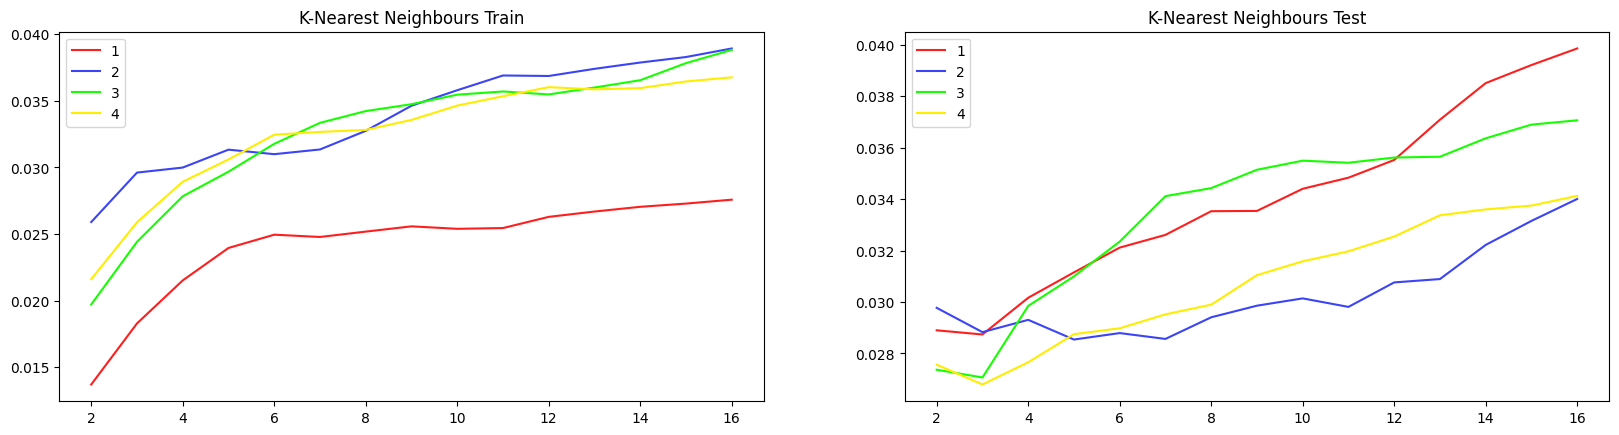

In [ ]:
# plot do KNN de treino e teste para todos os hiperparâmetros
plot_sets(trained, tested, title="K-Nearest Neighbours")

In [ ]:
# média aritmética dos MAPEs dos 4 conjuntos para o hiperparâmetro i
trained = pd.DataFrame(trained.mean(axis=1))
tested = pd.DataFrame(tested.mean(axis=1))

# armazenando o vetor de médias dos MAPEs na linha correspondente ao KNN
result_train.iloc[0,0] = trained
result_test.iloc[0,0] = tested

result_test

,MAPEs
KNN,0 2 0.028400 3 0.027856 4 0.0...
DTREE,-
RFRST,-
SVM,-


> ***Decision Tree***
>
Algoritmo da Árvore de Decisão aplicado aos 4 conjuntos de treinamento, utilizando um mínimo de observações ***n=5*** como hiperparâmetro inicial.

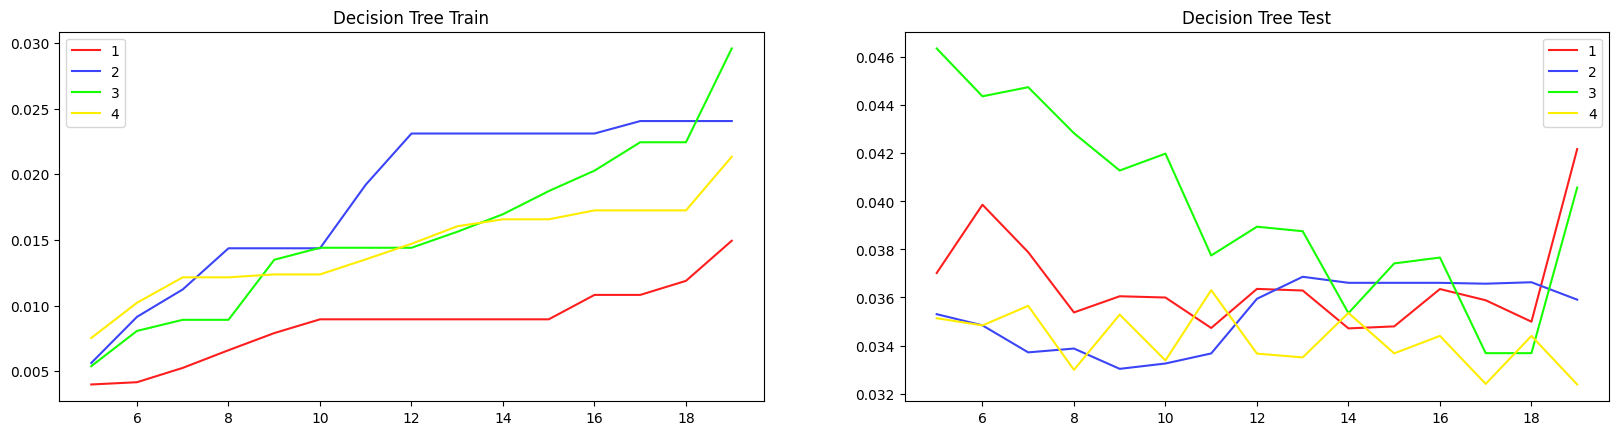

In [ ]:
trained, tested = train_and_test_4_sets(algorithm=dtree, hyperp_start=5, min_samples_split=None, criterion="absolute_error")

plot_sets(trained, tested, title="Decision Tree")

trained = pd.DataFrame(trained.mean(axis=1))
tested = pd.DataFrame(tested.mean(axis=1))

result_train.iloc[1,0] = trained
result_test.iloc[1,0] = tested

> ***Random Forest***
>
Algoritmo da Floresta Aleatória aplicado aos 4 conjuntos de treinamento, utilizando um número de árvores ***n=2*** como hiperparâmetro inicial.

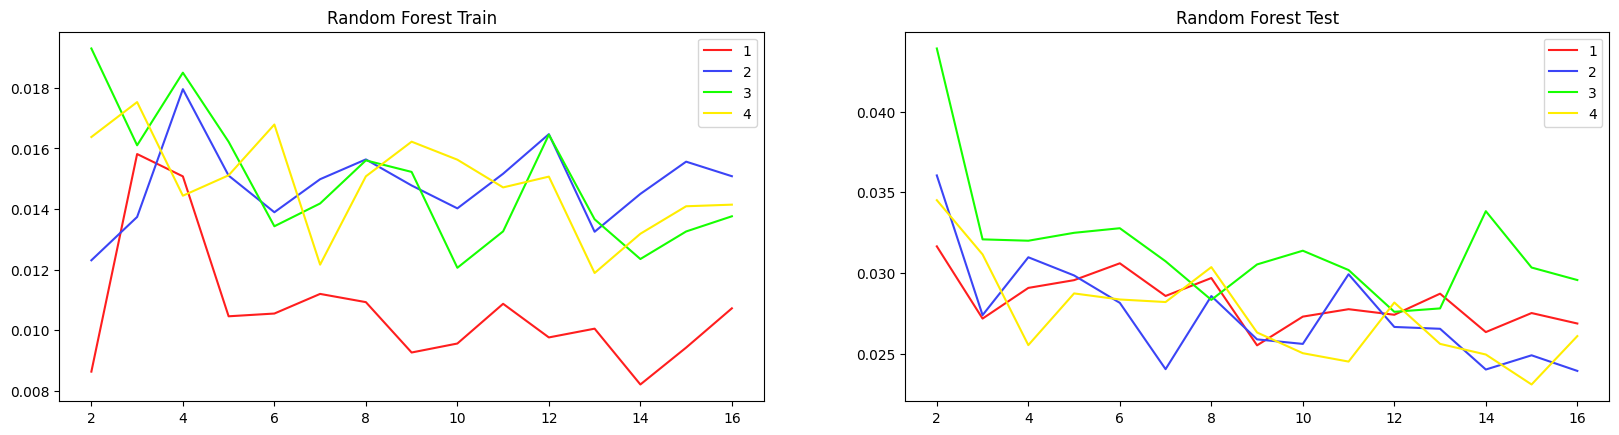

In [ ]:
trained, tested = train_and_test_4_sets(algorithm=rfrst, hyperp_start=2, n_estimators=None, n_jobs=-1)

plot_sets(trained, tested, title="Random Forest")

trained = pd.DataFrame(trained.mean(axis=1))
tested = pd.DataFrame(tested.mean(axis=1))

result_train.iloc[2,0] = trained
result_test.iloc[2,0] = tested

> ***Support Vector Machine(SVM)***
>
Algoritmo SVM aplicado aos 4 conjuntos de treinamento, utilizando uma tolerância ***n=2*** como hiperparâmetro inicial e incremento de 0.1 e transformação dos dados ***kernel="linear"***.

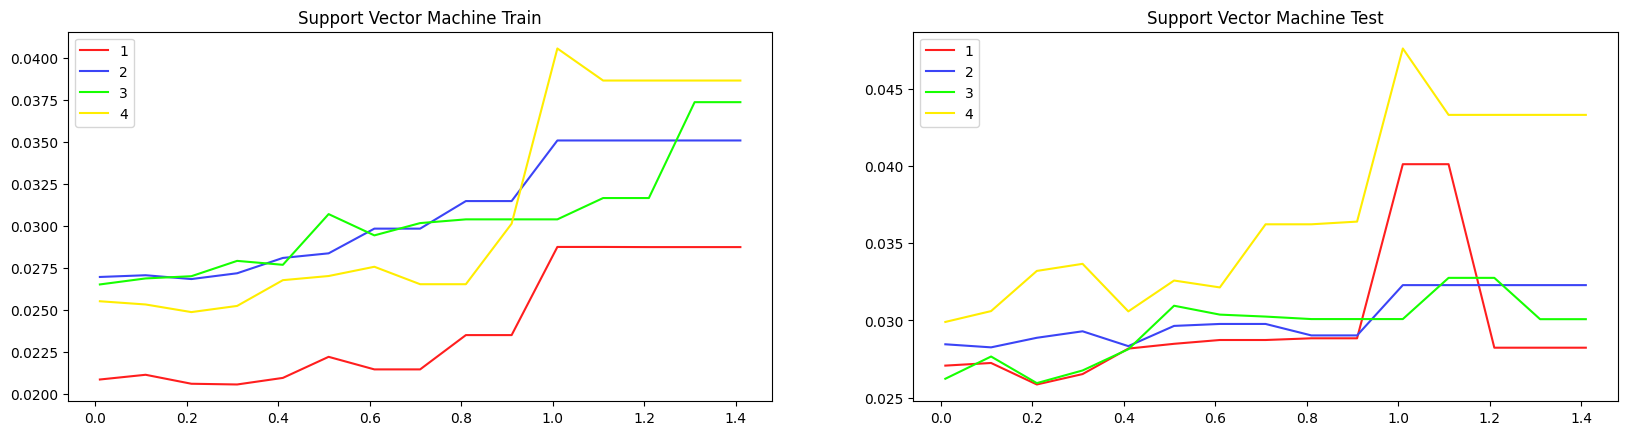

In [ ]:
trained, tested = train_and_test_4_sets(algorithm=svm, hyperp_start=0.01, step=0.1, tol=None, kernel="linear", C=1, cache_size=100)

plot_sets(trained, tested, title="Support Vector Machine")

trained = pd.DataFrame(trained.mean(axis=1))
tested = pd.DataFrame(tested.mean(axis=1))

result_train.iloc[3,0] = trained
result_test.iloc[3,0] = tested

In [ ]:
# o vetor de médias contendo 4 x 15 = 60 resultados
result_test

,MAPEs
KNN,0 2 0.028400 3 0.027856 4 0.0...
DTREE,0 5 0.038457 6 0.038478 7 0.0...
RFRST,0 2 0.036524 3 0.029443 4 0.0...
SVM,0 0.01 0.027913 0.11 0.028442 0...


> ***10% de 240 = 24 melhores***

In [ ]:
# armazena os 60 resultados em um DataFrame com colunas autoexplicativas
result_train = pd.DataFrame([(result_train.index[a], "{:.2f}".format(result_train.iloc[a,0].index[i]), result_train.iloc[a,0].iloc[i,0]) for i in range(15) for a in range(4)],
                           columns=["Modelo", "Hyperparameter", "MAPE"])

# ordena com base nos "MAPEs"
result_train = result_train.sort_values(by="MAPE").reset_index(drop=True)

# seleciona os 10% melhores de 240 resultados
result_train.iloc[:round(0.1*240), :]

,Modelo,Hyperparameter,MAPE
0,DTREE,5.00,0.005629
1,DTREE,6.00,0.007895
2,DTREE,7.00,0.009386
3,DTREE,8.00,0.010506
4,DTREE,9.00,0.012032
5,RFRST,14.00,0.012062
6,RFRST,13.00,0.012214
7,DTREE,10.00,0.012523
8,RFRST,10.00,0.012819
9,RFRST,15.00,0.013086


In [ ]:
# armazena os 60 resultados em um DataFrame com colunas autoexplicativas
result_test = pd.DataFrame([(result_test.index[a], "{:.2f}".format(result_test.iloc[a,0].index[i]), result_test.iloc[a,0].iloc[i,0]) for i in range(15) for a in range(4)],
                           columns=["Modelo", "Hyperparameter", "MAPE"])

# ordena com base nos "MAPEs"
result_test = result_test.sort_values(by="MAPE").reset_index(drop=True)

# seleciona os 10% melhores de 240 resultados = 24
result_test.iloc[:round(0.1*240), :]

,Modelo,Hyperparameter,MAPE
0,RFRST,15.00,0.026455
1,RFRST,16.00,0.026607
2,RFRST,9.00,0.027055
3,RFRST,13.00,0.027162
4,RFRST,14.00,0.027277
5,RFRST,10.00,0.027321
6,RFRST,12.00,0.027451
7,KNN,3.00,0.027856
8,RFRST,7.00,0.027879
9,SVM,0.01,0.027913
